In [49]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import altair as alt
import os, sys
current_directory = os.path.dirname(os.path.abspath("__file__"))
os.chdir(current_directory)
from configs import configurations

ImportError: cannot import name 'configurations' from 'configs' (/Users/patriciapaskov/Documents/GitHub/esg-scores/configs.py)

In [44]:
with open('configs.py', 'r') as file:
    lines = file.readlines()
for line in lines:
    print(line, end='')

class configs:
    def __init__(self):
        self.data_path = 'data'
        self.path_dict = {'bloomberg': f'{self.data_path}/ESG_spx_ftse_sx5e.xlsx',
                          'companies': f'{self.data_path}/sp500_companies.csv',
                          'industries': f'{self.data_path}/industries.csv'
                         }

In [41]:

# Set the current working directory to the directory of the script or notebook
from configs import *
bloomberg = pd.read_excel(Configs.path_dict['bloomberg'])

ImportError: cannot import name 'configs' from 'configs' (/Users/patriciapaskov/Documents/GitHub/esg-scores/configs.py)

In [12]:
#read in data 
bloomberg = pd.read_excel(Configs.path_dict['bloomberg'])
companies = pd.read_csv('data/sp500_companies.csv')
industries = pd.read_csv('data/industries.csv')

In [14]:
#merge datasets
bloomberg['Symbol'] = bloomberg['ID'].str.split(' ').str[0]
master = bloomberg.merge(companies, on='Symbol') 

In [15]:
alt.Chart(master).mark_point()

alt.Chart(...)

In [20]:
esg = (alt.Chart(master).mark_point()
    .encode(x='ESG_SCORE', y='Sector'))

gov = (alt.Chart(master).mark_point()
    .encode(x='GOVERNANCE_SCORE', y='Sector'))

soc = (alt.Chart(master).mark_point()
    .encode(x='SOCIAL_SCORE', y='Sector'))

combined_chart = soc + gov + esg
combined_chart = alt.hconcat(esg, gov, soc).resolve_scale(
    y='shared'
).properties(
    title='Company Scores by Sector'
)
display(combined_chart)


alt.HConcatChart(...)

In [7]:
(alt.Chart(master)
    .mark_bar()
    .encode(x='Sector',
            y='ESG_SCORE'))

alt.Chart(...)

In [8]:
alt.Chart(master).transform_density(
    'ESG_SCORE',
    as_=['ESG_SCORE', 'density'],
    ).mark_area().encode(
        x="ESG_SCORE:Q",
        y='density:Q',
    )

alt.Chart(...)

In [9]:
master.sort_values('ESG_SCORE', ascending=True)
master.head()

ID                          Name  ESG_SCORE  \
0   LYB UN Equity  LyondellBasell Industries NV       4.72   
1  SBNY UW Equity    Signature Bank/New York NY        NaN   
2   AXP UN Equity           American Express Co        NaN   
3    VZ UN Equity    Verizon Communications Inc        NaN   
4  AVGO UW Equity                  Broadcom Inc        NaN   

   ENVIRONMENTAL_SCORE  SOCIAL_SCORE  GOVERNANCE_SCORE  \
0                 3.18          4.50              7.01   
1                  NaN           NaN              5.39   
2                  NaN           NaN              7.75   
3                 5.61          5.03              7.96   
4                 4.24          2.21              7.43   

   ENERGY_CONSUMPTION_SUB_ISS_SCR  RENEWABLE_ENERGY_USE_SUB_ISS_SCR  \
0                            2.31                               NaN   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                            4.32                              0.73   
4                            5.72                               NaN   

   WATER_MANAGEMENT_ISSUE_SCORE  WORKFORCE_DIVERSITY_SUB_ISS_SCR  ...  \
0                          5.09                              NaN  ...   
1                           NaN                              NaN  ...   
2                           NaN                              NaN  ...   
3                           NaN                              6.7  ...   
4                          6.31                              NaN  ...   

  Currentprice     Marketcap        Ebitda Revenuegrowth      City State  \
0        86.42   28759193600  9.164000e+09         0.449   Houston    TX   
1       196.12   11891225600           NaN         0.482  New York    NY   
2       142.33  110242562048           NaN         0.208  New York    NY   
3        50.28  211063373824  4.510900e+10         0.021  New York    NY   
4       491.06  202745905152  1.568500e+10         0.158  San Jose    CA   

         Country  Fulltimeemployees  \
0  United States            19100.0   
1  United States             1854.0   
2  United States            64000.0   
3  United States           118500.0   
4  United States            20000.0   

                                 Longbusinesssummary    Weight  
0  LyondellBasell Industries N.V. operates as a c...  0.000933  
1  Signature Bank provides commercial banking pro...  0.000386  
2  American Express Company, together with its su...  0.003577  
3  Verizon Communications Inc., through its subsi...  0.006848  
4  Broadcom Inc. designs, develops, and supplies ...  0.006578  

[5 rows x 26 columns]

In [10]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                500 non-null    object 
 1   Name                              500 non-null    object 
 2   ESG_SCORE                         134 non-null    float64
 3   ENVIRONMENTAL_SCORE               411 non-null    float64
 4   SOCIAL_SCORE                      411 non-null    float64
 5   GOVERNANCE_SCORE                  481 non-null    float64
 6   ENERGY_CONSUMPTION_SUB_ISS_SCR    277 non-null    float64
 7   RENEWABLE_ENERGY_USE_SUB_ISS_SCR  198 non-null    float64
 8   WATER_MANAGEMENT_ISSUE_SCORE      211 non-null    float64
 9   WORKFORCE_DIVERSITY_SUB_ISS_SCR   214 non-null    float64
 10  Symbol                            500 non-null    object 
 11  Exchange                          500 non-null    object 
 12  Shortnam

In [11]:
master = master.rename(columns={"ESG_SCORE": "ESG", "ENVIRONMENTAL_SCORE": "Environmental", "SOCIAL_SCORE": "Social", "GOVERNANCE_SCORE": "Governance"})

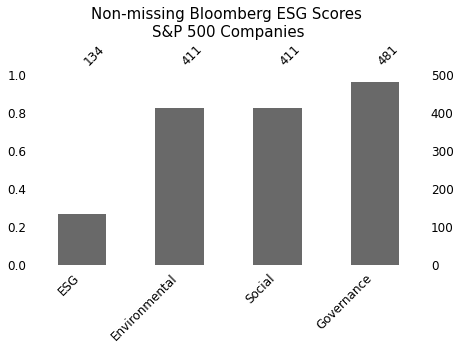

In [12]:
scores = master[['ESG','Environmental','Social','Governance']]
msno.bar(scores, figsize=(7,3.5), fontsize=12)
plt.title('Non-missing Bloomberg ESG Scores \nS&P 500 Companies', fontsize = 15)
plt.xticks()
plt.show;
plt.savefig('bloomberg_missing')

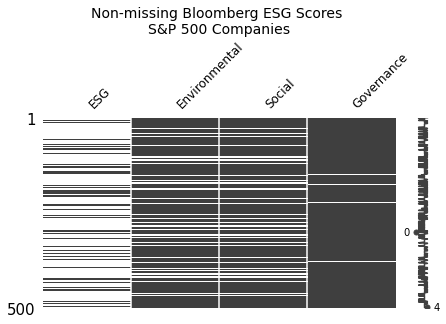

In [17]:
#is missing data bundled together?
import matplotlib
msno.matrix(scores, figsize=(7,3.5), fontsize=12)
plt.title('Non-missing Bloomberg ESG Scores \nS&P 500 Companies', fontsize = 14)
plt.show
plt.savefig('bloomberg_nonmissing')

<AxesSubplot:>

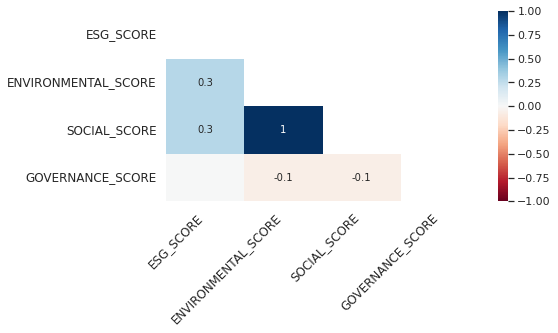

In [123]:
msno.heatmap(scores, figsize=(7,3.5), fontsize=12)

<AxesSubplot:xlabel='ESG_SCORE', ylabel='GOVERNANCE_SCORE'>

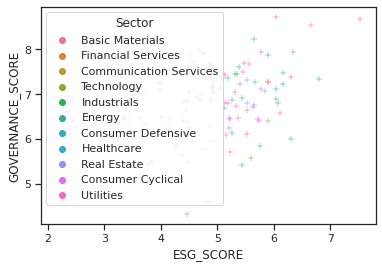

In [124]:
sns.scatterplot(data=master, y='GOVERNANCE_SCORE',x='ESG_SCORE', hue='Sector', marker='+')

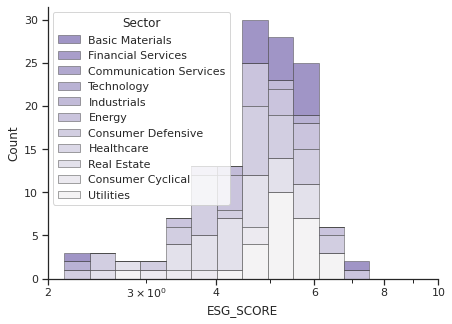

In [146]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    master,
    x="ESG_SCORE", hue="Sector",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([2, 4, 6, 8, 10]);